<a href="https://colab.research.google.com/github/kipsangchepesa/Python-Roulette/blob/master/How_does_land_surface_cover_affect_surface_temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question.

How does land surface cover affect surface temperature? 

##Dataset provided is for Reading between 1962 and 2010 with two land covers: 
• 100% Broad leaf trees

• 100% Bare soil  
and it can be downloaded from the following link:


a).[Broaad leaf trees](https:///www.met.reading.ac.uk/~swrmethn/python_teaching/assignment_data/baresoil_temperature_1962_2010.nc )

b).[Bare soil](https://www.met.reading.ac.uk/~swrmethn/python_teaching/assignment_data/broadleaftree_temperature_1962_2010.nc)

##Metrics for success 
 1. To explore the interaction between climate, land cover and surface temperature using a land surface model by using output from the JULES land surface model.

 2. To make sure that the configuration of JULES that produced the results we are using computes the energy and water balances at the land surface, based on prescribed weather and land cover. 

##Importing the libraries

In [2]:
pip install rioxarray 

     |████████████████████████████████| 47 kB 1.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 6.0 MB/s 
     |████████████████████████████████| 6.3 MB 39.7 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54612 sha256=90f261e192aebceb12207959ff993bbc89f5b1d21f05ed79d77071d9e9bf56d8
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [3]:
pip install nc_time_axis

In [4]:
pip install cftime 

In [5]:
import numpy as np  
import pandas as pd 
import cftime
import nc_time_axis
import rioxarray 
import xarray
import matplotlib.pyplot as plt
 



##Task 1 

Once you have downloaded the data, write a series of functions for reading, plotting and comparing time series of surface temperature for each land cover type.  How does surface temperature vary with land cover?  You should consider displaying your results in a variety of ways – for example histograms, time series and some simple statistics. 
Present your results as a short description and interpretation (maximum one page) plus four plots.  You should also submit your Python code file for assessment.    


we need to unpack the data. To do this, we use the Dataset class of the netCDF4 module.

In [6]:
#fh becomes the file handle of the open netCDF file, 
#and the ‘r’ denotes that we want to open the file in read only mode.
baresoil = '/content/baresoil_temperature_1962_2010.nc'
broadleaf ='/content/broadleaftree_temperature_1962_2010.nc'


In [18]:
xr=rioxarray.open_rasterio(baresoil)
xr

<xarray.DataArray 'tstar_gb' (Time: 588, y: 1, x: 1)>
array([[[274.66254]],

       [[274.93176]],

       ...,

       [[283.9293 ]],

       [[278.4061 ]]], dtype=float32)
Coordinates:
  * Time         (Time) object 1962-01-01 00:00:00 ... 2010-12-01 00:00:00
  * x            (x) float64 0.5
  * y            (y) float64 0.5
    spatial_ref  int64 0
Attributes: (12/13)
    date:           01/01/61
    long_name:      Gridbox surface temperature
    missing_value:  2e+20
    name:           tstar_gb
    source:         
    time:           00:00
    ...             ...
    units:          ('K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', '...
    valid_max:      300.32175
    valid_min:      267.81564
    _FillValue:     2.0000000400817547e+20
    scale_factor:   1.0
    add_offset:     0.0

In [24]:
xr.attrs['units']='mm'


In [20]:
print(xr.dims)
  

('Time', 'y', 'x')


In [26]:
print(xr.coords)


Coordinates:
  * Time         (Time) object 1962-01-01 00:00:00 ... 2010-12-01 00:00:00
  * x            (x) float64 0.5
  * y            (y) float64 0.5
    spatial_ref  int64 0


In [29]:
print(xr[:, :10, :10])

<xarray.DataArray 'tstar_gb' (Time: 588, y: 1, x: 1)>
array([[[274.66254]],

       [[274.93176]],

       ...,

       [[283.9293 ]],

       [[278.4061 ]]], dtype=float32)
Coordinates:
  * Time         (Time) object 1962-01-01 00:00:00 ... 2010-12-01 00:00:00
  * x            (x) float64 0.5
  * y            (y) float64 0.5
    spatial_ref  int64 0
Attributes: (12/13)
    date:           01/01/61
    long_name:      Gridbox surface temperature
    missing_value:  2e+20
    name:           tstar_gb
    source:         
    time:           00:00
    ...             ...
    units:          mm
    valid_max:      300.32175
    valid_min:      267.81564
    _FillValue:     2.0000000400817547e+20
    scale_factor:   1.0
    add_offset:     0.0


##plotting 

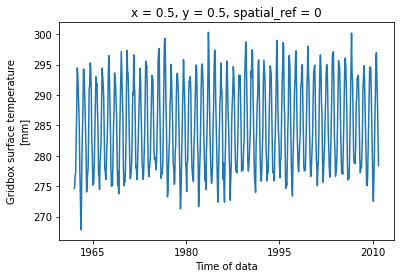

In [30]:
xr[:, :10, :10].plot()

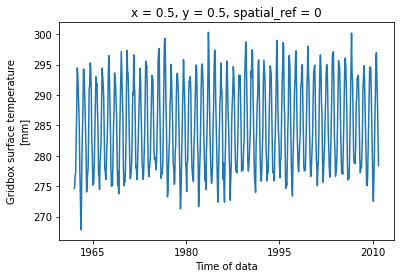

In [31]:
xr[:, :15, :15].plot()

##Task 2

Write a set of functions that will calculate and compare the mean seasonal cycle of temperature for each land cover type (i.e., the average over the years of temperature for each calendar month).  Describe your results using plots and brief text.   
Present your results in the form of a short description and interpretation (no more than one page) plus no more than four plots.  You should also submit your code file for assessment. 